Populating the interactive namespace from numpy and matplotlib
AOD dimensions (u'latitude', u'longitude')
long dimentions (u'longitude',)
Mean AOD at lon:-63.5, lat:-11.5 [[0.08869840204715729]]


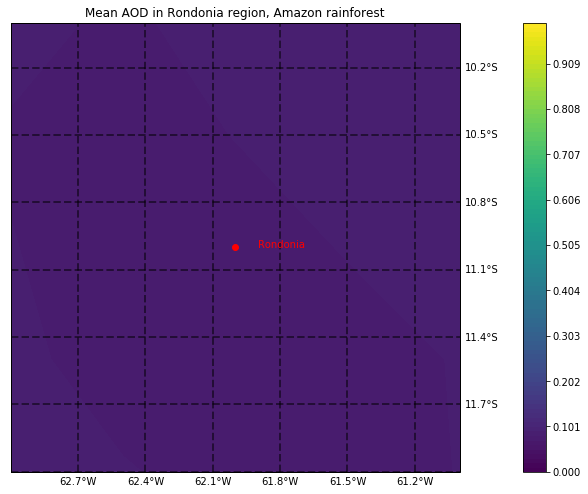

In [34]:
%pylab inline
from numpy import * 
from math import *
import os,sys
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
from cartopy import config
import xarray as xr 

#estimating the June 2008 mean AOD for the Rodonia region (11S, 63W)

figpath = '/group_workspaces/cems2/nceo_generic/CCI_LAND/figs/'
fig = plt.figure(figsize=(50, 38))

# get the path of the file. It can be found in the repo data directory.
filepath = '/group_workspaces/cems/aerosol_cci/public/cci_products/AATSR_ORAC_v04-01/L3_MONTHLY/2008/200806-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ORAC-MONTHLY-fv04.01.nc'
readfile = Dataset(filepath, mode='r')


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-63, -61,-10, -12,], ccrs.PlateCarree())


plt.title('Mean AOD in Rondonia region, Amazon rainforest')

lons = readfile.variables['longitude'][:] #retreive the longitude variables from the data file
lats = readfile.variables['latitude'][:] #for the latitude variables
meanvalue = readfile.variables['AOD550_mean'][:,:]

print 'AOD dimensions', readfile.variables['AOD550_mean'].dimensions
print 'long dimentions', readfile.variables['longitude'].dimensions


# Set the GeoAxes to a projection onto a cylinder tangent at the Equator.
#change_geometry(numrows, numcols, num)
ax.change_geometry(4,2,1)

#labeling the gridlines with just numbers, colouring the line black with the style -- and a linewidth of 2. 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=2, color='black', alpha=0.5, linestyle='--')


gl.xlabels_top = False
gl.ylabels_left = False

#creating the contour plot using the lat,lon and AOD_mean variables.
levels = linspace(0,1,100)

plot = plt.contourf(lons, lats, meanvalue, levels, 
             transform=ccrs.PlateCarree())
#create a colourbar. Shrink indicates the fraction by which to shrink the colourbar
#plt.pcolor(lons, lats, AOD_mean, cmap='cool')
colourbar = plt.colorbar(plot)

#x.formatter makes the -ve x values west and positive values east
#y.formatter -ve = south, + = north
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#mark on coastlines 
ax.coastlines('50m')

Rondonia_lon, Rondonia_lat = -62,-11

plt.plot([Rondonia_lon], [Rondonia_lat],
         color='red', linewidth=2, marker='o',
         transform=ccrs.Geodetic())
         
ax.text(-61.9,-11, 'Rondonia', color = 'red', transform=ccrs.Geodetic())

coordlon = np.where(lons == -63.5)
coordlat = np.where(lats == -11.5)
print 'Mean AOD at lon:-63.5, lat:-11.5', meanvalue[coordlon,coordlat]

#show the plot
plt.show()
#plt.savefig( figpath + 'AOD_rondonia.pdf')

Populating the interactive namespace from numpy and matplotlib


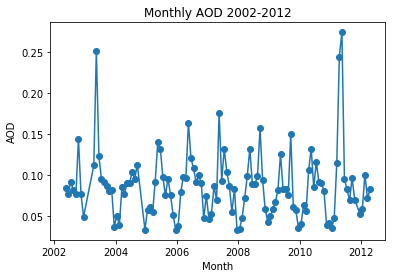

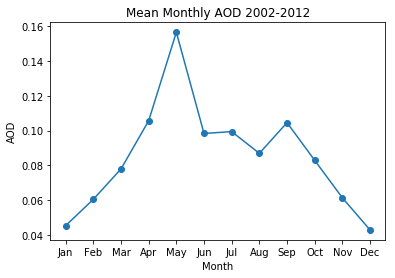

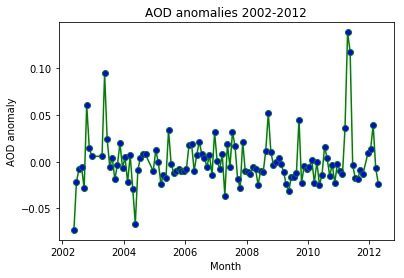

In [36]:
%pylab inline
from numpy import * 
from math import *
import os,sys
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import fnmatch
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
from cartopy import config
import xarray as xr 
import itertools
from operator import itemgetter 
import re

figpath = '/group_workspaces/cems2/nceo_generic/CCI_LAND/figs/'
#Path to AOD data 
path = "/group_workspaces/cems/aerosol_cci/public/cci_products/AATSR_ORAC_v04-01/L3_MONTHLY"

#locate .nc files
list_of_paths = [] # empty list to write files ending in .nc to 
for root, dirs, files in os.walk(path): # locating files in the L3_Monthly directory ending in .nc 
    for file in files:
        if file.endswith(".nc"):
            file_path = (os.path.join(root, file)) #gives the full root to the file path. e.g. /group_workspaces/cems/aerosol_cci/public/cci_products/AATSR_ORAC_v04-01/L3_MONTHLY/2008/200805-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ORAC-MONTHLY-fv04.01.nc
            list_of_paths.append(file_path) # writes each full file path to the empty list defined above


#extracting the year and month from each file path name. E.g. 200805 2008 = year, 05 = month.          
list_of_times = []
list_of_months = [] 
list_of_years = []
list_of_files = []

for item in list_of_paths:
    getfilepath = item.split('/') # seperating the file path by '/' and writing each section as a new element in a list. E.g.   #print getfilepath
    # /AATSR_ORAC_v04-01/L3_MONTHLY/2008/200805-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ORAC-MONTHLY-fv04.01.nc   
    # becomes a new list [AATSR_ORAC_v04-01,L3_MONTHLY,2008,200805-ESACCI-L3C_AEROSOL-AER_PRODUCTS-AATSR-ENVISAT-ORAC-MONTHLY-fv04.01.nc]
    # Date and month info is found in the last item in this list
    filename = getfilepath[(len(getfilepath)-1)] # last element in list
    #Extract the year
    YYYY = filename[:4]
    YEAR = float(YYYY)
    #Extract the month
    MM = filename[4:6]
    #print MM
    MONTH = float(MM)
    #Time series type plot
    list_of_months.append(MONTH)
    list_of_years.append(YEAR)
    list_of_files.append(filename)
    ts = YEAR + (MONTH-0.5)/12. #centre of the month
    list_of_times.append(ts)# writing each time to a new list

sortedtimes = np.argsort(list_of_times) #sorting list_of_times numerically
sortedpath = [list_of_paths[i] for i in sortedtimes] #ordering list_of_paths using corresponding sortedtimes array. 
x = [list_of_times[i] for i in sortedtimes]



AODs = [] # empty list where AOD's at -63.5, -11.5 for each .nc file will be written to.

# Extract info from .nc file
for item in sortedpath:
    readfile = Dataset(item,mode='r') #read data 
    lons = readfile.variables['longitude'][:] 
    lats = readfile.variables['latitude'][:]
    mean_AOD_values = readfile.variables['AOD550_mean'][:,:]
    coordlon = np.where(lons == -63.5) # locate where in list of lons where value == -63.5 
    coordlat = np.where(lats == -11.5)
    AOD_at_point = mean_AOD_values[coordlon,coordlat] # retrieve AOD value at this coordinate
    AOD_at_point = float(AOD_at_point) 
    AODs.append(AOD_at_point)


# plot the AODs for each month from 2002-2012
plt.plot(x, AODs, 'o-')
plt.title('Monthly AOD 2002-2012')
plt.ylabel('AOD')
plt.xlabel('Month')
plt.show()
plt.savefig( figpath + 'monthly_AOD_2002_2012.pdf')

AOD_values = np.array(AODs) #converting AODs to an array for the def function below

#Monthly AOD average
Jan = []
Feb = []
Mar = []
Apr = []
May = []
Jun = []
Jul = []
Aug = []
Sep = []
Oct = []
Nov = []
Dec = []
count = 0  
#List of months is in 1,2,3,4 etc format. Where 1 = Jan, 2 = Feb etc. This for loop identifies where 
#e.g. list_of_months ==1 and writes that index to a new list, in this case Jan. (could use np.where()?)

#ordering list_of_months using corresponding sortedtimes array. 
months_ordered = [list_of_months[i] for i in sortedtimes]

for item in months_ordered:
    if item == 1: # January 
        Jan.append(count) # e.g. 1st, 3rd and 5th element in list_of _months =1, so Jan = [0,2,4]
    if item == 2:
        Feb.append(count)
    if item == 3:
        Mar.append(count)
    if item == 4:
        Apr.append(count)
    if item == 5:
        May.append(count)
    if item == 6:
        Jun.append(count)
    if item == 7:
        Jul.append(count)
    if item == 8:
        Aug.append(count)
    if item == 9:
        Sep.append(count)
    if item == 10:
        Oct.append(count)
    if item == 11:
        Nov.append(count)
    if item == 12:
        Dec.append(count)
    count = count+1

Averages = []
#seperate AOD values into different months
def computeaverage(month,AOD):
    AOD_month = itemgetter(*month)(AOD) #Extracting AOD value for each month from list of all AOD values
    average = sum(AOD_month)/len(AOD_month) # avearge AOD for each month
    Averages.append(average) # writing monthly averages to a list 
    return AOD_month #return AOD values for each month 

#functions to be read into def comuteaverage(month,AOD) which computes monthly average and writes this to the Averages list.
m1 = computeaverage(Jan,AOD_values) # Jan = index
m2 = computeaverage(Feb, AOD_values)
m3 = computeaverage(Mar, AOD_values)
m4 = computeaverage(Apr, AOD_values)
m5 = computeaverage(May, AOD_values)
m6 = computeaverage(Jun, AOD_values)
m7 = computeaverage(Jul, AOD_values)
m8 = computeaverage(Aug, AOD_values)
m9 = computeaverage(Sep, AOD_values)
m10 = computeaverage(Oct, AOD_values)
m11 = computeaverage(Nov, AOD_values)
m12 = computeaverage(Dec, AOD_values)


#compute anomalie for each AOD value by substracting the monthly mean
anomfinal = [] 
for i in range(len(AOD_values)):
    anom2 = AOD_values[i] - Averages[int(months_ordered[i])-1]
    anomfinal.append(anom2)

#plotting AOD monthly average
xticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # my x ticks 
month = linspace(1,12,12) # list from 1 to 12 
 
#plotting monthly AOD mean
plt.xticks(month, xticks)
plt.plot(month, Averages, 'o-')
plt.title('Mean Monthly AOD 2002-2012')
plt.ylabel('AOD')
plt.xlabel('Month')
plt.show()
plt.savefig( figpath + 'monthly_AOD_mean_plot.pdf')

#plotting AOD anomalies
plt.title('AOD anomalies 2002-2012')
plt.xlabel('Month')
plt.ylabel('AOD anomaly')
plt.plot(x, anomfinal, marker = 'o', color = 'green',
        markerfacecolor='blue', markersize=6)    
plt.show()
plt.savefig( figpath + 'AOD_anomalies.pdf')
#print AOD_anomalies